In [166]:
import open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

In [167]:
FOV = 90
WIDTH = 1280
HEIGHT = 720
MAX_NUM_TRI = 8754

In [168]:
def get_viewpoint_tri_id(mesh_obj_path, _eye, _center, _up, filename):
    mesh = o3d.io.read_triangle_mesh(mesh_obj_path)
    # print(mesh)
    # print(np.asarray(mesh.vertices))
    # print(np.asarray(mesh.triangles))
    # print(type(mesh))
    mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
    scene = o3d.t.geometry.RaycastingScene()
    scene.add_triangles(mesh)

    rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
        fov_deg=FOV,
        eye=_eye,
        center=_center,
        up=_up,
        width_px=WIDTH,
        height_px=HEIGHT,
    )

    ans = scene.cast_rays(rays)
    # plt.imshow(ans['t_hit'].numpy())
    # print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
    df = pd.DataFrame(ans['primitive_ids'].numpy())
    df.to_csv(f'./{filename}_primitive_ids.csv', index=False)
    # ans_unique = np.unique(ans['primitive_ids'].numpy())
    # print(ans_unique.shape[0])

TriangleMesh with 4731 points and 8754 triangles.
[[-1500.          1000.          1499.99987793]
 [-1312.5         1000.          1499.99987793]
 [-1500.           937.5         1499.99987793]
 ...
 [  -49.5102005    563.93121338   -54.59370041]
 [  -49.68389893   567.44897461   -54.80879974]
 [  -45.92039871   566.14611816   -55.94490051]]
[[   0    1    2]
 [   3    4    5]
 [   3    6    4]
 ...
 [4730 4709 4729]
 [4730 4727 4711]
 [4730 4729 4727]]
[[500.39078 501.17447 501.96066 ... 501.96072 501.1746  500.3909 ]
 [500.39078 501.17447 501.96066 ... 501.96072 501.1746  500.3909 ]
 [500.39078 501.17447 501.96066 ... 501.96072 501.1746  500.3909 ]
 ...
 [500.39093 501.17462 501.96072 ... 501.96072 501.17453 500.39084]
 [500.39093 501.17462 501.96072 ... 501.96072 501.17453 500.39084]
 [500.39093 501.17462 501.96072 ... 501.96072 501.17453 500.39084]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[3042 3042 30

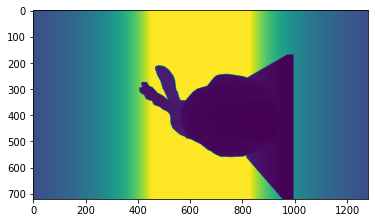

In [176]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
print(mesh)
print(np.asarray(mesh.vertices))
print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    eye=[200, 500, -0],
    center=[199, 500, -0],
    up=[0, -0, 1],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
plt.imshow(ans['t_hit'].numpy())
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test.csv', index=False)

ans_unique, counts = np.unique(ans['primitive_ids'].numpy(), return_counts=True)
print(ans_unique.shape[0])
print(ans_unique)
print(ans_unique[-1])
print(counts[-1])



In [175]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
# print(mesh)
# print(np.asarray(mesh.vertices))
# print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

# rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
#     fov_deg=90,
#     center=[0, 500, 0],
#     eye=[0, 500, 200],
#     up=[-1, 0, 0],
#     width_px=1280,
#     height_px=720,
# )

_eye = np.array([-200, 500, 0])

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    eye=[0, 500, -200],
    center=[-0, 500, -199],
    up=[0, -1, 0],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
# plt.imshow(ans['t_hit'].numpy())
# print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test_1.csv', index=False)

ans_unique, counts = np.unique(ans['primitive_ids'].numpy(), return_counts=True)
print(ans_unique.shape[0])
print(ans_unique)
print(ans_unique[-1])
print(counts[-1])

2458
[   0    1    2 ... 8748 8750 8751]
8751
155


In [171]:
def cal_coverage_by_np(base_view, src_view):
    base_num_arr = np.zeros(MAX_NUM_TRI+1)
    base_unique, base_counts = np.unique(base_view, return_counts=True)
    for idx in range(base_unique.shape[0]):
        if base_unique[idx] == 4294967295:
            base_num_arr[0] = base_counts[idx]
        else:
            base_num_arr[base_unique[idx]] = base_counts[idx]

    src_num_arr = np.zeros(MAX_NUM_TRI+1)
    unique, counts = np.unique(src_view, return_counts=True)
    for idx in range(unique.shape[0]):
        if unique[idx] == 4294967295:
            src_num_arr[0] = counts[idx]
        else:
            src_num_arr[unique[idx]] = counts[idx]

    merge_min = np.minimum(base_num_arr, src_num_arr)
    coverage = np.sum(merge_min) / (WIDTH*HEIGHT)
    return coverage

In [172]:
base_num_arr = np.zeros(8754+1)
base_view = pd.read_csv('./test.csv').to_numpy()
base_unique, base_counts = np.unique(base_view, return_counts=True)

for idx in range(base_unique.shape[0]):
    if base_unique[idx] == 4294967295:
        base_num_arr[0] = base_counts[idx]
    else:
        base_num_arr[base_unique[idx]] = base_counts[idx]

print(base_num_arr)
print(np.count_nonzero(base_num_arr))


src_num_arr = np.zeros(8754+1)
src_view = pd.read_csv('./test_1.csv').to_numpy()
unique, counts = np.unique(src_view, return_counts=True)

for idx in range(unique.shape[0]):
    if unique[idx] == 4294967295:
        src_num_arr[0] = counts[idx]
    else:
        src_num_arr[unique[idx]] = counts[idx]
print(src_num_arr)
print(np.count_nonzero(src_num_arr))

merge_min = np.minimum(base_num_arr, src_num_arr)
print(merge_min)
print(np.count_nonzero(merge_min))
print(np.sum(merge_min))
coverage = np.sum(merge_min) / (1280*720)
print(coverage)


[ 0.  0.  0. ... 69.  1.  0.]
2033
[828. 933. 128. ...   0.   0.   0.]
2458
[0. 0. 0. ... 0. 0. 0.]
448
33619.0
0.03647894965277778


In [173]:
def euler_to_camera(x,y,z,yaw,pitch,roll):
    '''
    in UE
    '''
    # euler to vector
    eye = []
    center = []
    up = []

    shift_xyz = [x,y,z]
    r = R.from_euler('zyx', [yaw, pitch, roll], degrees=True)
    rotMat = r.as_matrix()
    
    eye = np.round_(np.array([shift_xyz[1],-shift_xyz[2],-shift_xyz[0]]), decimals=2)
    
    center_arr = np.dot(rotMat, np.array([1,0,0]).T)
    print('center_arr: ', center_arr)
    center = np.round_(np.array(eye + [center_arr[1],-center_arr[2],-center_arr[0]]), decimals=2)
    # center_arr = np.array(center_arr + shift_xyz)
    # center = np.round_([center_arr[1],center_arr[2],-center_arr[0]], decimals=2)
    
    up_arr = np.dot(rotMat, np.array([0,0,-1]).T)
    up = np.round_([up_arr[1],-up_arr[2],-up_arr[0]], decimals=2)

    print('eye: ', eye)
    print('center: ', center)
    print('up: ', up)
    print()

    return eye, center, up

In [174]:
x = 0
y = 2
z = 0
yaw = -90
pitch = 0
roll = 0
eye, center, up = euler_to_camera(x*100,y*100,z*100-500,yaw,pitch,roll)
print(eye)
print(center)
print(up)
# eye=[-200, 500, 0],
# center=[0, 500, 0],
# up=[0, -1, 0],


center_arr:  [ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
eye:  [200 500   0]
center:  [199. 500.  -0.]
up:  [ 0.  1. -0.]

[200 500   0]
[199. 500.  -0.]
[ 0.  1. -0.]
